# APRENDIZAJE SUPERVISADO 

### XGBoost

Primero: instalar librerias

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install certifi

Note: you may need to restart the kernel to use updated packages.


In [3]:

pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Segundo: Carga de la base de datos con ucimlrepo y asignación de variables.

In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
BD_Obesity = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = BD_Obesity.data.features 
y = BD_Obesity.data.targets 

Tercero: Análisis exploratorio de los datos.

In [8]:
import pandas as pd

BD_Obesity = pd.DataFrame(X)
BD_Obesity_y = pd.DataFrame(y)

BD_Obesity['Target'] = BD_Obesity_y

BD_Obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
# Mostrar las primeras filas de los DataFrames
print(X.head())
print(y.head())

# Información sobre el DataFrame
print(X.info())

# Estadísticas descriptivas
print(X.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
            NO

In [10]:
# Analizamos las variables de tipo object
BD_Obesity.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Target
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [11]:
V_Categoricas = BD_Obesity.select_dtypes(include='object')
V_Numericas = BD_Obesity.select_dtypes(include='float64')

In [12]:
V_Categoricas

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Target
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [13]:
V_Numericas

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [14]:
# Analizamos las variables de tipo object
BD_Obesity.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Target
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [15]:
BD_Obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [16]:
V_Categoricas = BD_Obesity.select_dtypes(include='object')
V_Numericas = BD_Obesity.select_dtypes(include='float64')

In [17]:

V_Categoricas

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Target
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


Quinto: Análisis de variables categóricas 

In [18]:
# Genero
V_Categoricas['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [19]:
# ¿Comes algún alimento entre comidas?
V_Categoricas['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [20]:
#¿Con qué frecuencia bebes alcohol?
V_Categoricas['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [21]:
# ¿Qué transporte utilizas habitualmente?
V_Categoricas['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [22]:
# Nivel de obesidad
V_Categoricas['Target'].value_counts()

Target
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Sexto : Análisis de variables númericas 

<Axes: >

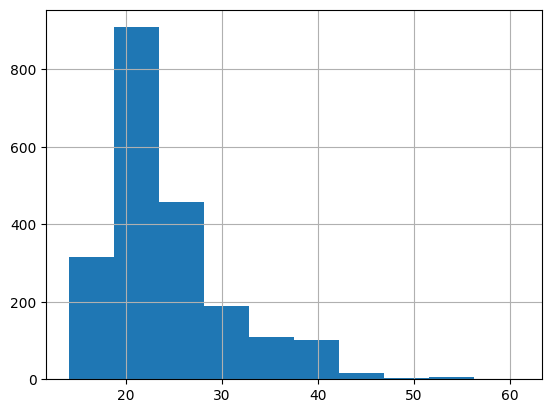

In [23]:
# Edad
V_Numericas['Age'].hist()

<Axes: >

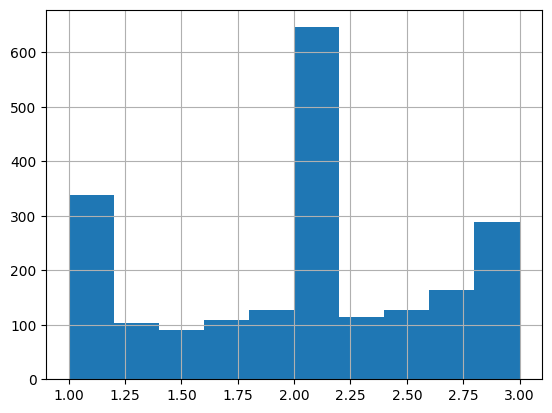

In [24]:
# ¿Cuánta agua bebes diariamente?
V_Numericas['CH2O'].hist()

<Axes: >

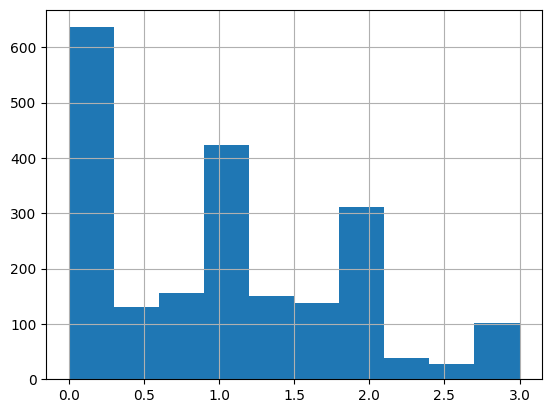

In [25]:
# ¿Con qué frecuencia realiza actividad física?
V_Numericas['FAF'].hist()

<Axes: >

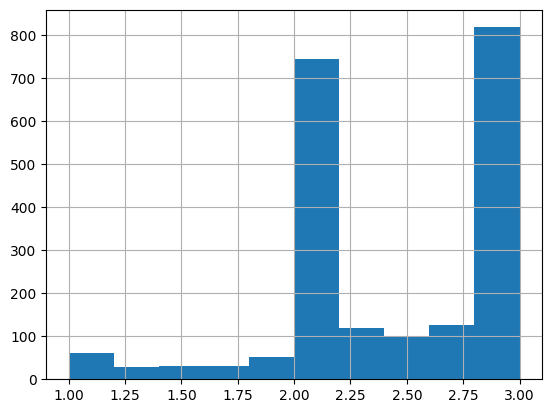

In [26]:
# ¿Sueles comer verduras en tus comidas?
V_Numericas['FCVC'].hist()

<Axes: >

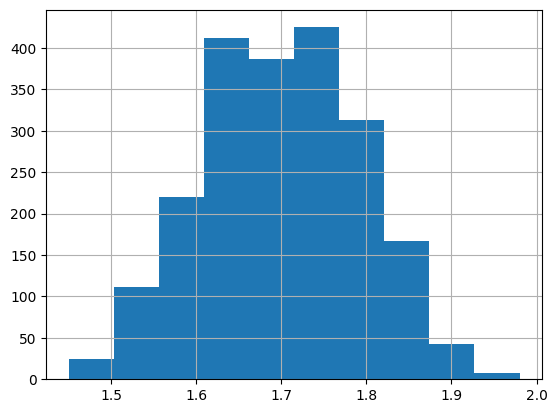

In [27]:
# Altura
V_Numericas['Height'].hist()

<Axes: >

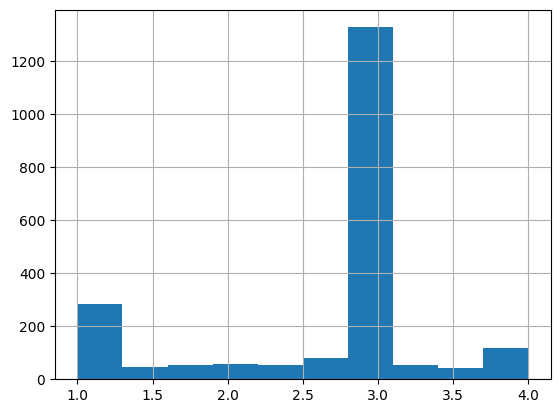

In [28]:
# ¿Cuántas comidas principales haces al día?
V_Numericas['NCP'].hist()

<Axes: >

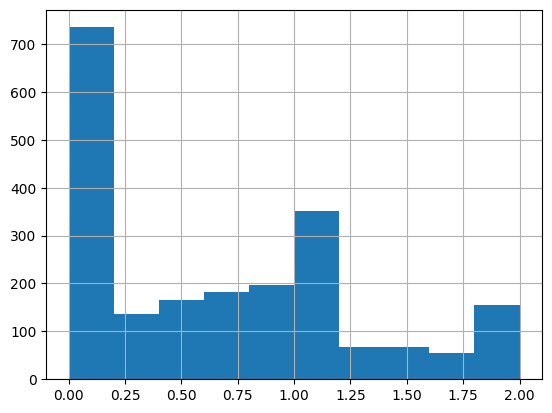

In [29]:
#¿Cuánto tiempo utiliza dispositivos tecnológicos como celular, videojuegos, televisión, computadora y otros?
V_Numericas['TUE'].hist()

<Axes: >

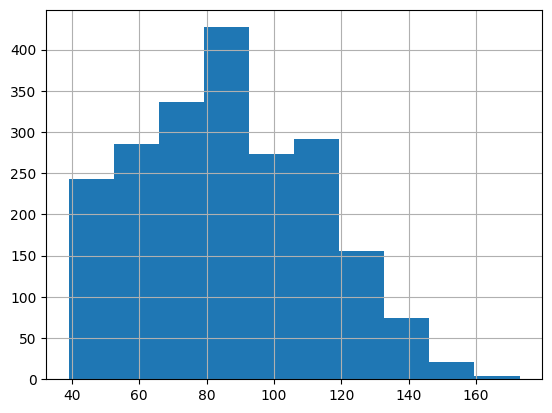

In [30]:
# Peso
V_Numericas['Weight'].hist()

Séptimo: Visualización de relación entre variables

<Axes: xlabel='CH2O', ylabel='Target'>

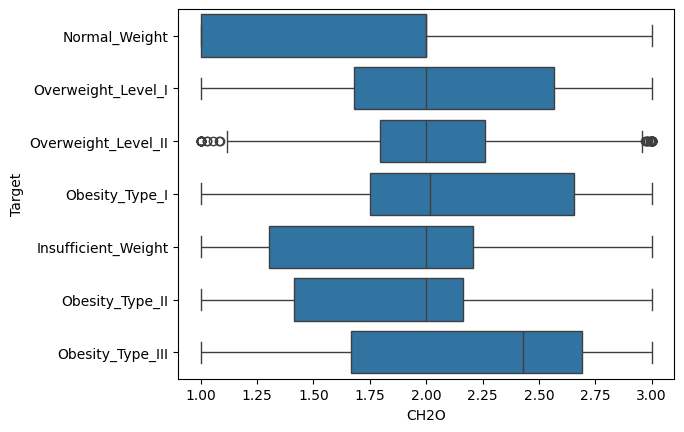

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='CH2O' , y='Target'  , data= BD_Obesity)

<Axes: xlabel='Age', ylabel='Target'>

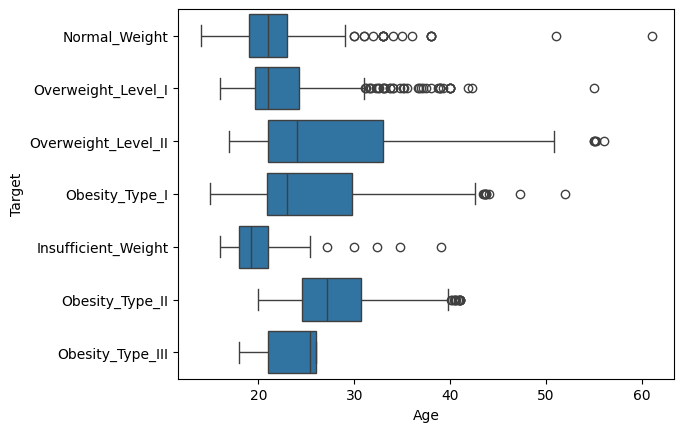

In [32]:
sns.boxplot(x= 'Age' , y = 'Target' , data= BD_Obesity)

<Axes: xlabel='NCP', ylabel='Target'>

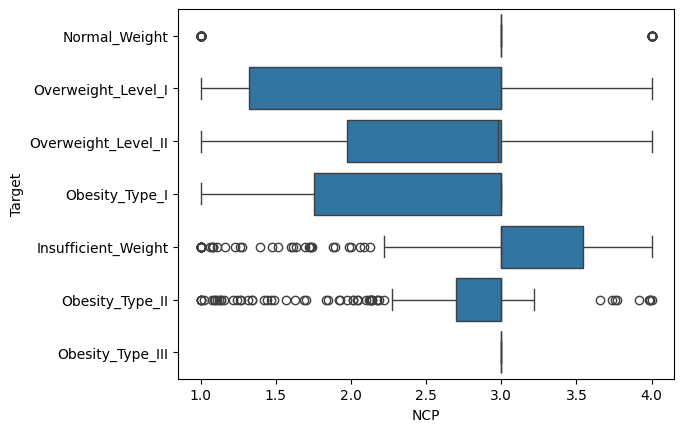

In [33]:
sns.boxplot(x= 'NCP' , y = 'Target' , data= BD_Obesity)

<Axes: xlabel='FCVC', ylabel='Target'>

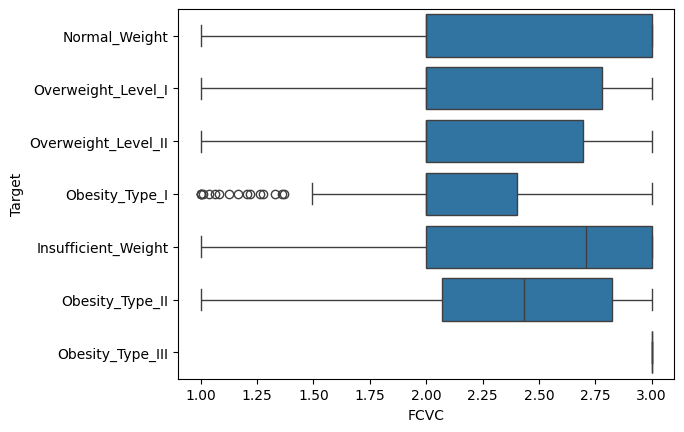

In [34]:
sns.boxplot(x= 'FCVC' , y = 'Target' , data= BD_Obesity)

<Axes: xlabel='Weight', ylabel='Height'>

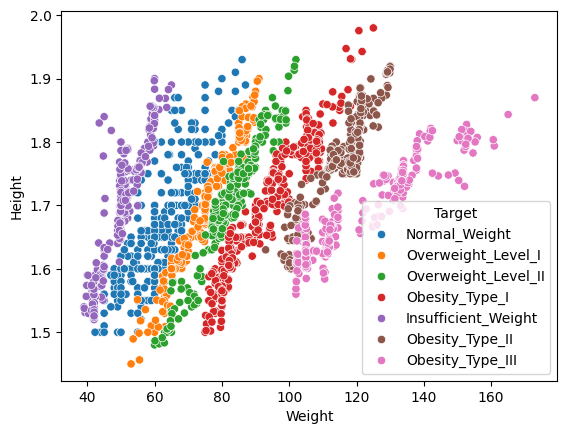

In [74]:
sns.scatterplot(data=BD_Obesity , x='Weight', y='Height' , hue='Target')

Octavo: Correlación entre variables númericas

In [35]:
V_Numericas.corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


Noveno: Label encoder

In [36]:
BD_Obesity_y['NObeyesdad'] = BD_Obesity_y['NObeyesdad'].str.replace(".", "")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
BD_Obesity_y['NObeyesdad'] = le.fit_transform(BD_Obesity_y['NObeyesdad'])

In [37]:
BD_Obesity_y['NObeyesdad'].value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

Noveno: Tratamiento para datos nulos con el metodo SimpleImputer

In [38]:
# realizamos simple imputer para las variables categoricas 

from sklearn.impute import SimpleImputer

imputer_categoricas = SimpleImputer( strategy= 'constant' , fill_value='?')
imputer_numericas = SimpleImputer( strategy= 'mean' )

# Realizamos la transformacion para las variables

BD_Obesity_Cate = imputer_categoricas.fit_transform(V_Categoricas)
BD_Obesity_Cate = pd.DataFrame(BD_Obesity_Cate,columns=V_Categoricas.columns)

In [39]:
BD_Obesity_Cate['Target'].value_counts()

Target
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Décimo: Encoder para las variables categóricas. 

In [40]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

OHE_COLS=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
ORD_COLS=['CAEC','CALC','MTRANS']

# Instanciamos los objetos
ohe=OneHotEncoder()
ord=OrdinalEncoder()

# Hacemos el fit de los objetos con los datos

ohe.fit(BD_Obesity[OHE_COLS])
ord.fit(BD_Obesity[ORD_COLS])

# Hacemos la transformación de los datos

ohe_data=ohe.transform(BD_Obesity[OHE_COLS]).toarray()
ord_data=ord.transform(BD_Obesity[ORD_COLS])

# Hacemos un merge de los datos

obesity_data_cat=pd.concat([pd.DataFrame(ohe_data), pd.DataFrame(ord_data)], axis=1)

obesity_data_cat.head()

,0,1,2,3,4,5,6,7,8,9,0,1,2
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,3.0


In [41]:
# hacemos el fit_transform de las variables numéricas

from sklearn.preprocessing import StandardScaler, MinMaxScaler

SS_COLS=['FCVC','NCP','TUE']
MM_COLS=['Age','Height','Weight','CH2O','FAF']

# Instanciamos los objetos

ss=StandardScaler()
mm=MinMaxScaler()

# Hacemos el fit de los objetos con los datos

ss.fit(BD_Obesity[SS_COLS])
mm.fit(BD_Obesity[MM_COLS])

# Hacemos la transformación de los datos

ss_data=ss.transform(BD_Obesity[SS_COLS])
mm_data=mm.transform(BD_Obesity[MM_COLS])

# Hacemos un merge de los datos

obesity_data_num=pd.concat([pd.DataFrame(ss_data), pd.DataFrame(mm_data)], axis=1)
obesity_data_num.columns=['FCVC','NCP','TUE','Age','Height','Weight','CH2O','FAF']

obesity_data_num.head()

,FCVC,NCP,TUE,Age,Height,Weight,CH2O,FAF
0,-0.785019,0.404153,0.561997,0.148936,0.320755,0.186567,0.5,0.000000
1,1.088342,0.404153,-1.080625,0.148936,0.132075,0.126866,1.0,1.000000
2,-0.785019,0.404153,0.561997,0.191489,0.660377,0.283582,0.5,0.666667
3,1.088342,0.404153,-1.080625,0.276596,0.660377,0.358209,0.5,0.666667
4,-0.785019,-2.167023,-1.080625,0.170213,0.622642,0.379104,0.5,0.000000


Onceavo: Creación de Pipelines

In [42]:
## PIPELINE y COLUMN TRANSFORMER
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler, MinMaxScaler, LabelEncoder

### Los objetos que definimos son

imp_cat = SimpleImputer(strategy='constant',fill_value='?')
imp_num = SimpleImputer(strategy='mean')
ohe=OneHotEncoder(sparse_output=False)
ord=OrdinalEncoder()
ss=StandardScaler()
mm=MinMaxScaler()

cat_pipe_ohe=Pipeline(steps=[('imputer',imp_cat),
                             ('encoder',ohe)])

cat_pipe_ord=Pipeline(steps=[('imputer',imp_cat),
                                ('encoder',ord)])


num_pipe_ss=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',ss)])

num_pipe_mm=Pipeline(steps=[('imputer',imp_num),
                            ('scaler',mm)])

# Hacemos un ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe', cat_pipe_ohe, OHE_COLS),
        ('cat_ord', cat_pipe_ord, ORD_COLS),
        ('num_ss', num_pipe_ss, SS_COLS),
        ('num_mm', num_pipe_mm, MM_COLS)
    ])


In [43]:
preprocessor

ColumnTransformer(transformers=[('cat_ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'SMOKE', 'SCC']),
                                ('cat_ord',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['CAEC', 'CALC', 'MTRANS']),
                                ('num_ss',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['FCVC', 'NCP', 'TUE']),
                                ('num_mm',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Height', 'Weight', 'CH2O', 'FAF'])])

In [44]:
## Data procesada
pd.set_option('display.max_columns', None)

data_processed_arr=preprocessor.fit_transform(BD_Obesity[OHE_COLS+ORD_COLS+SS_COLS+MM_COLS],BD_Obesity_y)

data_processed=pd.DataFrame(data_processed_arr)

data_processed.columns=preprocessor.transformers_[0][1]['encoder'].get_feature_names_out().tolist()+\
                        ORD_COLS+SS_COLS+MM_COLS

data_processed.head()

,x0_Female,x0_Male,x1_no,x1_yes,x2_no,x2_yes,x3_no,x3_yes,x4_no,x4_yes,CAEC,CALC,MTRANS,FCVC,NCP,TUE,Age,Height,Weight,CH2O,FAF
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,3.0,-0.785019,0.404153,0.561997,0.148936,0.320755,0.186567,0.5,0.000000
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,3.0,1.088342,0.404153,-1.080625,0.148936,0.132075,0.126866,1.0,1.000000
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,-0.785019,0.404153,0.561997,0.191489,0.660377,0.283582,0.5,0.666667
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,1.088342,0.404153,-1.080625,0.276596,0.660377,0.358209,0.5,0.666667
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,3.0,-0.785019,-2.167023,-1.080625,0.170213,0.622642,0.379104,0.5,0.000000


Doceavo: 

In [45]:
import xgboost as xgb

In [60]:
# Configuramos los hiperparametros
hiperparametros_xgb = {
   'n_estimators': [400, 100, 500, 200, 300],  
    'max_depth': [10, 20, 30, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
    
}

In [61]:
# Creamos el modelo con XGB
from sklearn.model_selection import GridSearchCV

modelo_xgb = xgb.XGBClassifier()
modelo_xgb_grid = GridSearchCV(modelo_xgb , hiperparametros_xgb , cv=5 , n_jobs=1 , verbose=3)


In [63]:
modelo_xgb_grid

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [400, 100, 500, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [64]:
# División de los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_processed, BD_Obesity_y, test_size=0.2, random_state=42)

In [65]:

# Entrenar el modelo
modelo_xgb_grid.fit(X_train, y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6;, score=0.956 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6;, score=0.947 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6;, score=0.962 total time=   1.3s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6;, score=0.958 total time=   1.4s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.6;, score=0.950 total time=   1.4s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=0.959 total time=   1.4s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=0.944 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=400, subsample=0.8;, score=0.970 total time=   1.4s
[CV 4/5] END learning_rate=0.01, max_dept

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [400, 100, 500, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [66]:
### Hacemos un predict

y_pred = modelo_xgb_grid.predict(X_test)

In [69]:
# Imprimimos el predict
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.84      0.89        62
           2       0.96      0.97      0.97        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.87      0.95      0.91        56
           6       1.00      0.96      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.95       423
weighted avg       0.96      0.96      0.95       423



In [68]:
### El mejor modelo es:

modelo_xgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': None,
 'n_estimators': 400,
 'subsample': 0.6}